In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows' , 10000)
pd.set_option('display.max_columns' , 10000)

In [3]:
df  = pd.read_csv('ireland_property.csv')

In [4]:
df.head(10)

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",NaN,Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
5,2010-01-04,"12 Sallymount Avenue, Ranelagh",NaN,Dublin,425000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
6,2010-01-04,"13 Oakleigh Wood, Dooradoyle, Limerick",NaN,Limerick,172500.0,0,0,Second-Hand Dwelling house /Apartment,NaN
7,2010-01-04,"13 The Drive, Chapelstown Gate, Tullow Road",NaN,Carlow,177500.0,0,0,Second-Hand Dwelling house /Apartment,NaN
8,2010-01-04,"15 Carriglawn, Waterpark, Carrigaline",NaN,Cork,180000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
9,2010-01-04,"15a Moore Bay, Kilkee",NaN,Clare,126500.0,0,0,Second-Hand Dwelling house /Apartment,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476745 entries, 0 to 476744
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SALE_DATE           476745 non-null  object 
 1   ADDRESS             476745 non-null  object 
 2   POSTAL_CODE         89764 non-null   object 
 3   COUNTY              476745 non-null  object 
 4   SALE_PRICE          476745 non-null  float64
 5   IF_MARKET_PRICE     476745 non-null  int64  
 6   IF_VAT_EXCLUDED     476745 non-null  int64  
 7   PROPERTY_DESC       476745 non-null  object 
 8   PROPERTY_SIZE_DESC  52792 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 32.7+ MB


In [6]:
df.describe()

,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED
count,4.767450e+05,476745.000000,476745.000000
mean,2.590403e+05,0.048984,0.159618
std,8.526791e+05,0.215835,0.366252
min,5.030530e+03,0.000000,0.000000
25%,1.150000e+05,0.000000,0.000000
50%,1.950000e+05,0.000000,0.000000
75%,3.000000e+05,0.000000,0.000000
max,1.701428e+08,1.000000,1.000000


In [7]:
df['Year'] = pd.to_datetime(df['SALE_DATE'])
df['Year'] = df['Year'].apply(lambda x : x.year)


In [8]:
df.head(2)

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC,Year
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,NaN,2010
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010


In [9]:
df['Month'] = pd.to_datetime(df['SALE_DATE'])
df['Month'] = df['Month'].apply(lambda x : x.month)

In [10]:
# Check for the null values : 
df.isnull().sum()

SALE_DATE                  0
ADDRESS                    0
POSTAL_CODE           386981
COUNTY                     0
SALE_PRICE                 0
IF_MARKET_PRICE            0
IF_VAT_EXCLUDED            0
PROPERTY_DESC              0
PROPERTY_SIZE_DESC    423953
Year                       0
Month                      0
dtype: int64

In [11]:
# Since for the Postal Code, Property Size, Address, Property Sise Desc. are not required
# Check for the Property Desc and make column for the 0-1 for property second hand or first hand

deleting_list  = ['SALE_DATE' , 'ADDRESS' , 'POSTAL_CODE' , 'PROPERTY_SIZE_DESC']

df.drop(labels=deleting_list , axis=1 , inplace=True)


In [12]:
df.head()

,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,Year,Month
0,Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,2010,1
1,Laois,185000.0,0,1,New Dwelling house /Apartment,2010,1
2,Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,2010,1
3,Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,2010,1
4,Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,2010,1


In [13]:
def change_property_desc(text_data):
    value  = str(text_data)
    if "Second-Hand Dwelling" in value:
        return 0
    else :
        return 1

df['second_hand'] = df['PROPERTY_DESC'].apply(lambda x : change_property_desc(x))

In [14]:
df.head()

,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,Year,Month,second_hand
0,Dublin,343000.0,0,0,Second-Hand Dwelling house /Apartment,2010,1,0
1,Laois,185000.0,0,1,New Dwelling house /Apartment,2010,1,1
2,Dublin,438500.0,0,0,Second-Hand Dwelling house /Apartment,2010,1,0
3,Meath,400000.0,0,0,Second-Hand Dwelling house /Apartment,2010,1,0
4,Kilkenny,160000.0,0,0,Second-Hand Dwelling house /Apartment,2010,1,0


In [15]:
# Now check for the values in which the values are null :

df.isnull().sum()

COUNTY             0
SALE_PRICE         0
IF_MARKET_PRICE    0
IF_VAT_EXCLUDED    0
PROPERTY_DESC      0
Year               0
Month              0
second_hand        0
dtype: int64

Univariate and Bivariate Analysis  : 

    Sale Price trend over time
    County vs sale price
    sale price vs year and month
    sale price vs second hand
    country vs vat excluded
    country vs market price
    county vs year and Month

Multivariate Analysis :

    Pair Plot for all analytics and check for the trend in any specific type

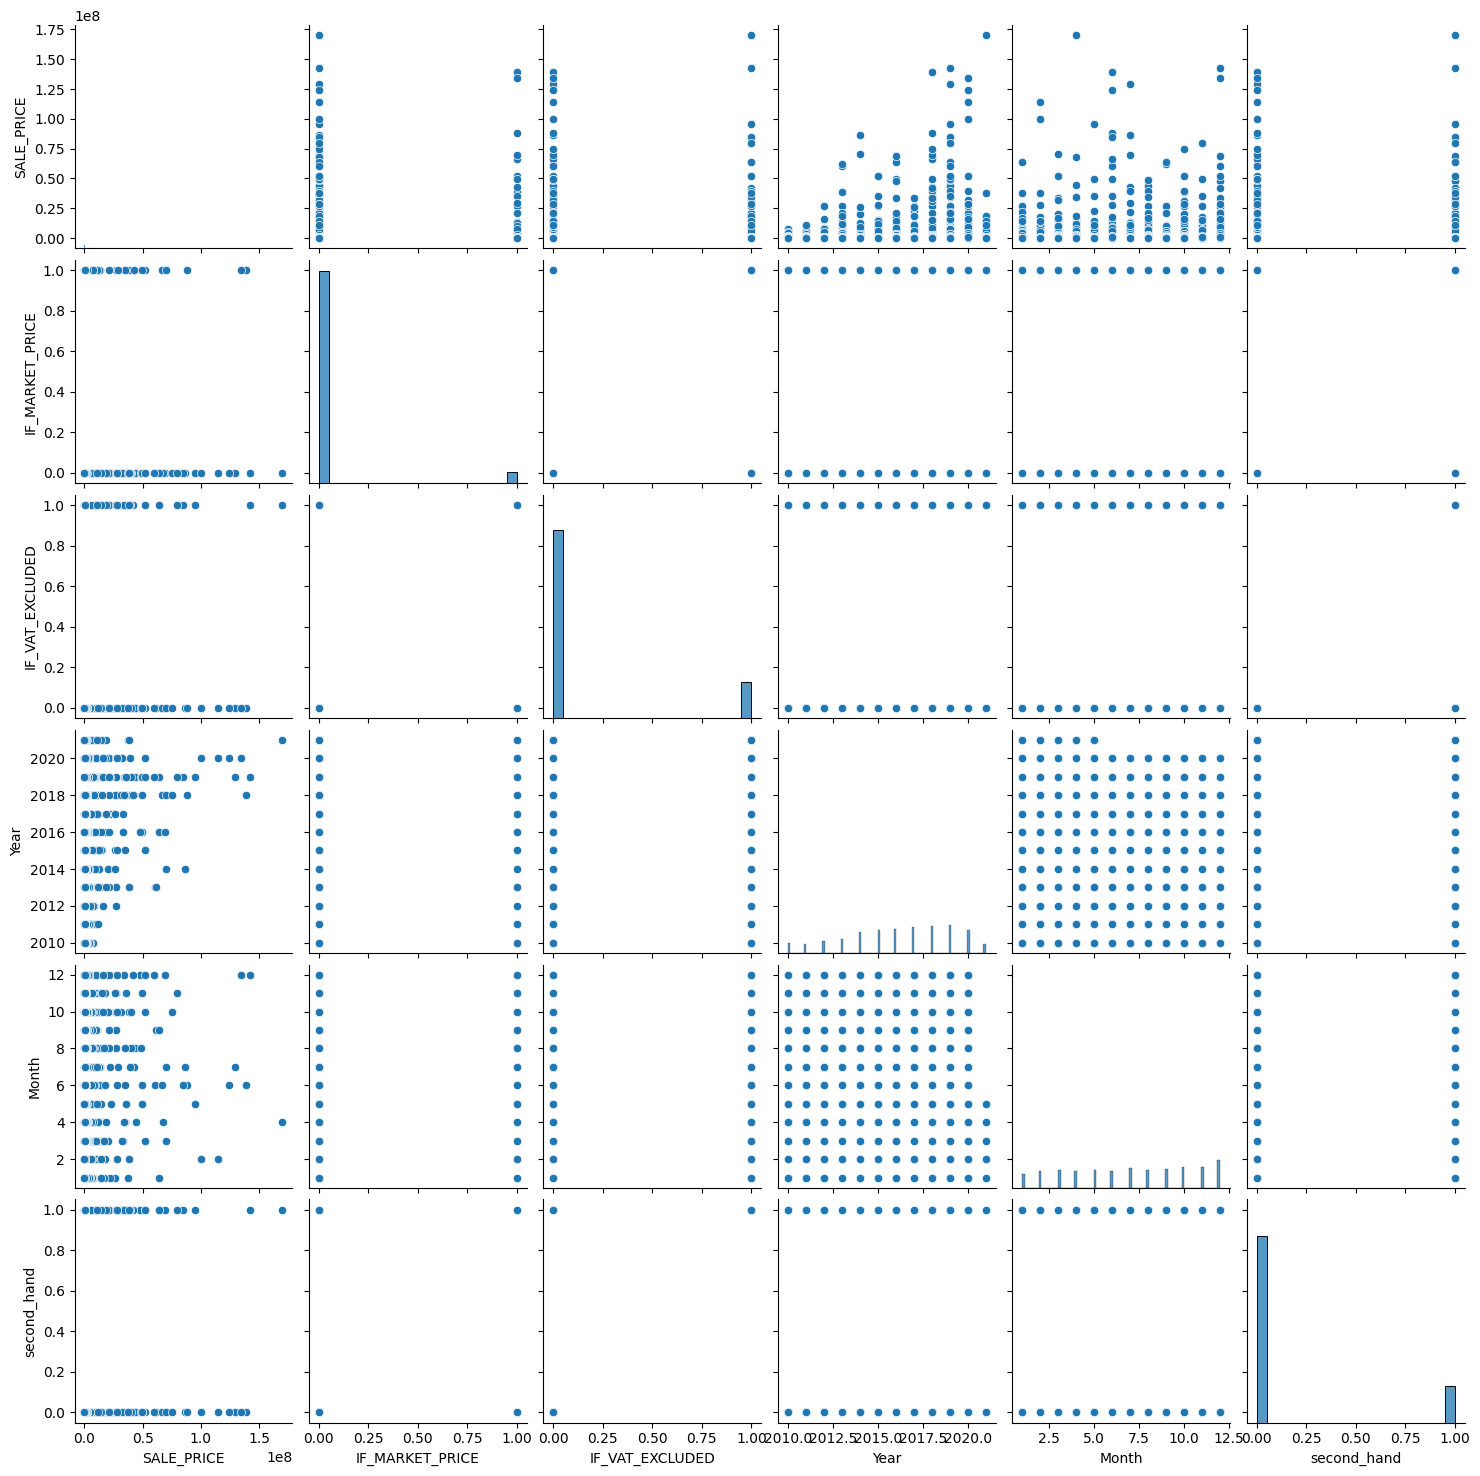

In [16]:
sns.pairplot(df)

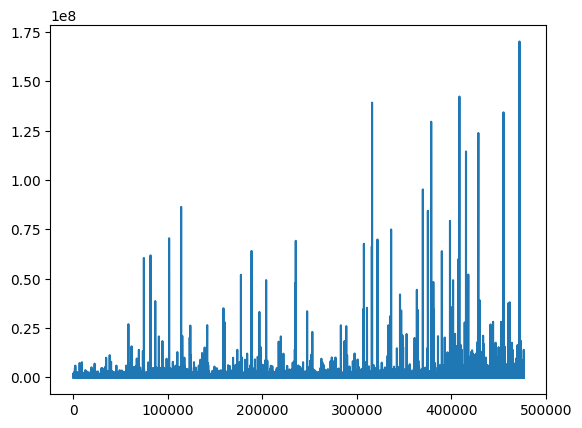

In [17]:
plt.plot(df['SALE_PRICE'])
plt.show()